# Bar Chart with Matplotlib

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Setting seaborn as default style even if use only matplotlib
sns.set()

## Data Visualizations From Pandas DataFrames

In [2]:
# grouped daily customer date
grouped_daily_customer_data_url = "https://raw.githubusercontent.com/nyangweso-rodgers/Data_Analytics/main/Analytics-with-Python/Exploratory-Data-Analysis-with-Python/Exploratory-Data-Analysis-for-Online-Retail-Store/grouped_daily_customer_data.csv"
grouped_daily_customer_df = pd.read_csv(grouped_daily_customer_data_url, parse_dates=['Date', 'MonthYear', 'Week'])
print("Grouped Daily Customer DataFrame: ", grouped_daily_customer_df.shape)

Grouped Daily Customer DataFrame:  (16766, 7)


In [3]:
# preview the data
grouped_daily_customer_df.head()

,CustomerID,Date,Country,MonthYear,Week,TotalAmount,CountOfUniqueInvoices
0,12346.0,2011-01-18,United Kingdom,2011-01-01,2011-01-17,77183.60,1
1,12347.0,2010-12-07,Iceland,2010-12-01,2010-12-06,711.79,1
2,12347.0,2011-01-26,Iceland,2011-01-01,2011-01-24,475.39,1
3,12347.0,2011-04-07,Iceland,2011-04-01,2011-04-04,636.25,1
4,12347.0,2011-06-09,Iceland,2011-06-01,2011-06-06,382.52,1


In [4]:
grouped_daily_customer_df['CustomerID'] = grouped_daily_customer_df['CustomerID'].astype(float)
grouped_daily_customer_df.dtypes

CustomerID                      float64
Date                     datetime64[ns]
Country                          object
MonthYear                datetime64[ns]
Week                     datetime64[ns]
TotalAmount                     float64
CountOfUniqueInvoices             int64
dtype: object

#### Data Aggregations for Visualizations

In [5]:
# -- get month on month total sales value
monthly_sales_value_df = grouped_daily_customer_df.groupby('MonthYear').agg(
    TotalAmount = pd.NamedAgg(column='TotalAmount', aggfunc='sum'),
).reset_index()

# -- get month on month count of customers and invoices
monthly_customers_df = grouped_daily_customer_df.groupby('MonthYear').agg(
    UniqueCustomersInvoiced = pd.NamedAgg(column='CustomerID', aggfunc='nunique'),
    CountOfUniqueInvoices = pd.NamedAgg(column='CountOfUniqueInvoices', aggfunc='sum')
).reset_index()

In [6]:
monthly_sales_value_df.head()

,MonthYear,TotalAmount
0,2010-12-01,572713.890
1,2011-01-01,569445.040
2,2011-02-01,447137.350
3,2011-03-01,595500.760
4,2011-04-01,469200.361


In [7]:
monthly_customers_df.head()

,MonthYear,UniqueCustomersInvoiced,CountOfUniqueInvoices
0,2010-12-01,885,1400
1,2011-01-01,741,987
2,2011-02-01,758,998
3,2011-03-01,974,1321
4,2011-04-01,856,1149


### The Base Bar Chart

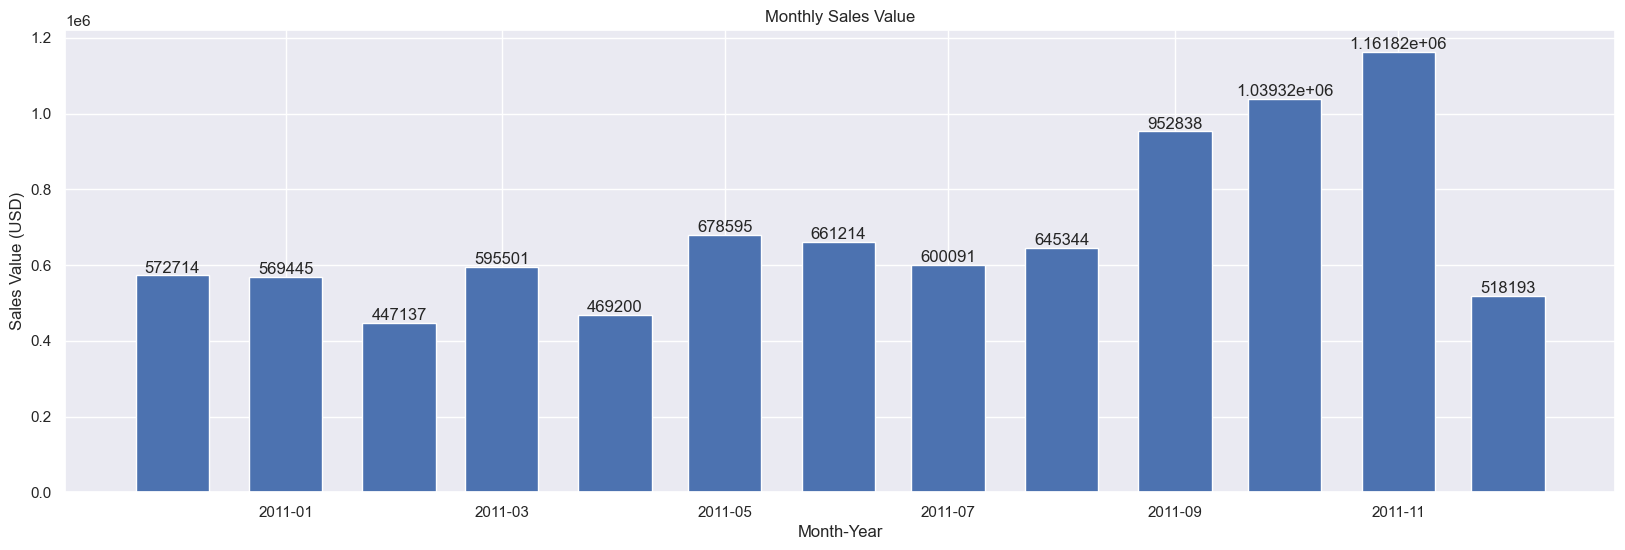

In [42]:
# plot
fig,ax = plt.subplots(figsize = (20,6))

# bars
bars = plt.bar(
  monthly_sales_value_df.MonthYear, 
  monthly_sales_value_df.TotalAmount, 
  #color='o', 
  width=20 # --# the width of the bars: can also be len(x) sequence
  )

# add labels
plt.bar_label(
  bars,
  #labels = [f'{x:.0%}' for x in bars.datavalues],
  #padding = 2,
  fontsize = 12
)

# grid line
#plt.grid(axis = 'y',alpha = 0.45)

# labels and title
plt.title('Monthly Sales Value')
plt.ylabel('Sales Value (USD)')
plt.xlabel('Month-Year')

plt.show()

#### Total Sales Value By Month-Year

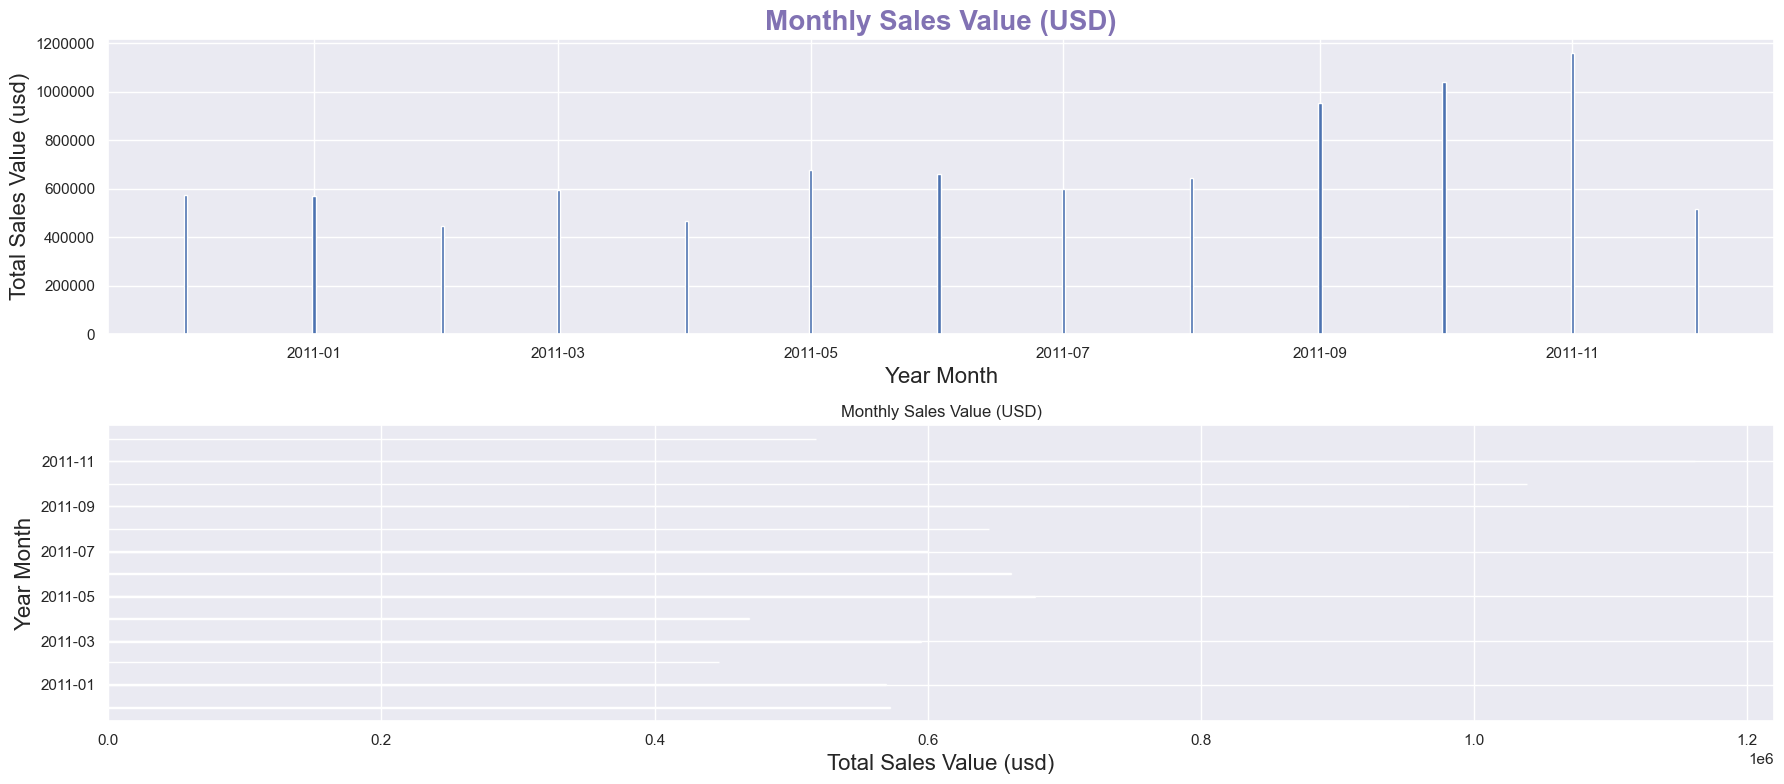

In [31]:
# --- Setup the figure and the axes:
#plt.ticklabel_format(style='plain')
fig, ax = plt.subplots(2,1, sharey=False, figsize=(18,8))



ax[0].bar(monthly_sales_value_df.MonthYear, monthly_sales_value_df.TotalAmount)
#ax[0].set_xticklabels(monthly_agg_df.MonthYear)
ax[0].ticklabel_format(axis='y', style='plain')
# -- Set the label for each bar to appear inside each bar with the value
#ax.set_xticks(x)
#ax[0].bar_label(container=ax[0], label_type="center")
ax[0].set_title(label='Monthly Sales Value (USD)',
                fontdict={"fontsize": 20,
                          "color": 'm',
                          "weight": "bold"}
                )
ax[0].set_xlabel('Year Month', fontsize = 16)
ax[0].set_ylabel('Total Sales Value (usd)', fontsize = 16 )

# To convert the the Vertical Bar Chart to Horizontal Bar Chart, we replace “__plt.bar()__” to (__plt.barh__)
ax[1].barh(monthly_sales_value_df.MonthYear, monthly_sales_value_df.TotalAmount, color='m')
#ax[1].ticklabel_format(axis='y', style='sci')
ax[1].set_title(label='Monthly Sales Value (USD)')
ax[1].set_xlabel('Total Sales Value (usd)', fontsize = 16)
ax[1].set_ylabel("Year Month", fontsize = 16)

plt.tight_layout()  # same as fig.tight_layout()

#### Total Sales Value By Country

<BarContainer object of 37 artists>

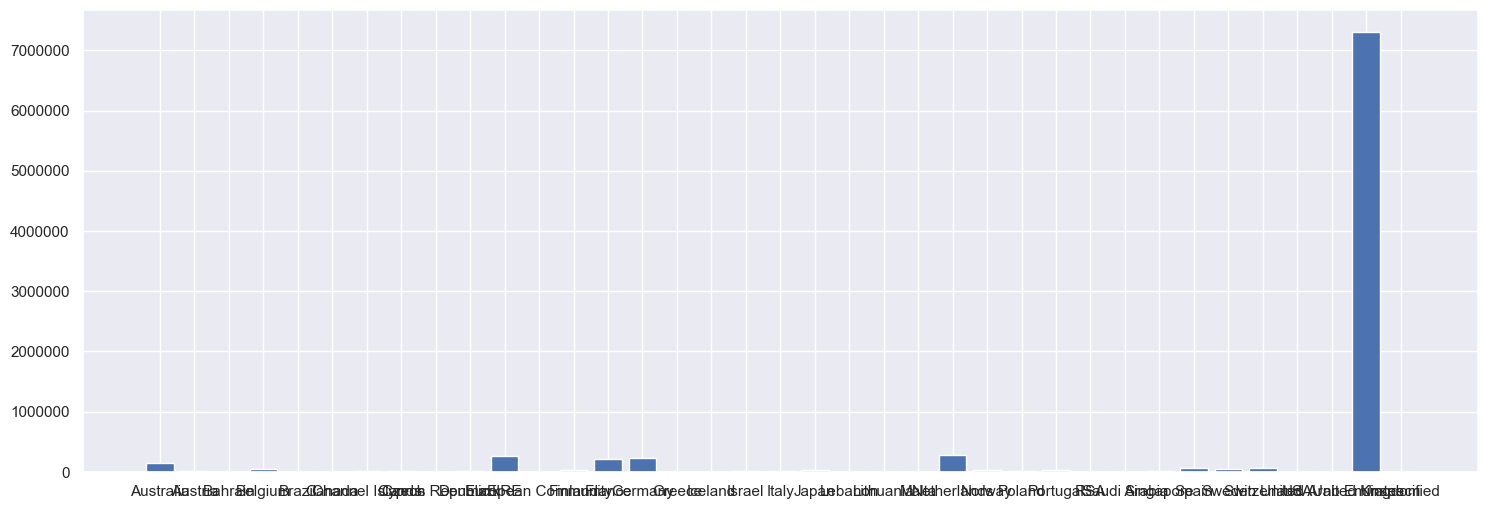

In [30]:
# chart 3: Sales Value By Country
fig, ax = plt.subplots(figsize=(18,6))
# display the plain values in the Y-axis
ax.ticklabel_format(axis='y', style='plain')
ax.bar(grouped_country_df.Country, grouped_country_df.TotalAmount)

### Custmizing the Bars

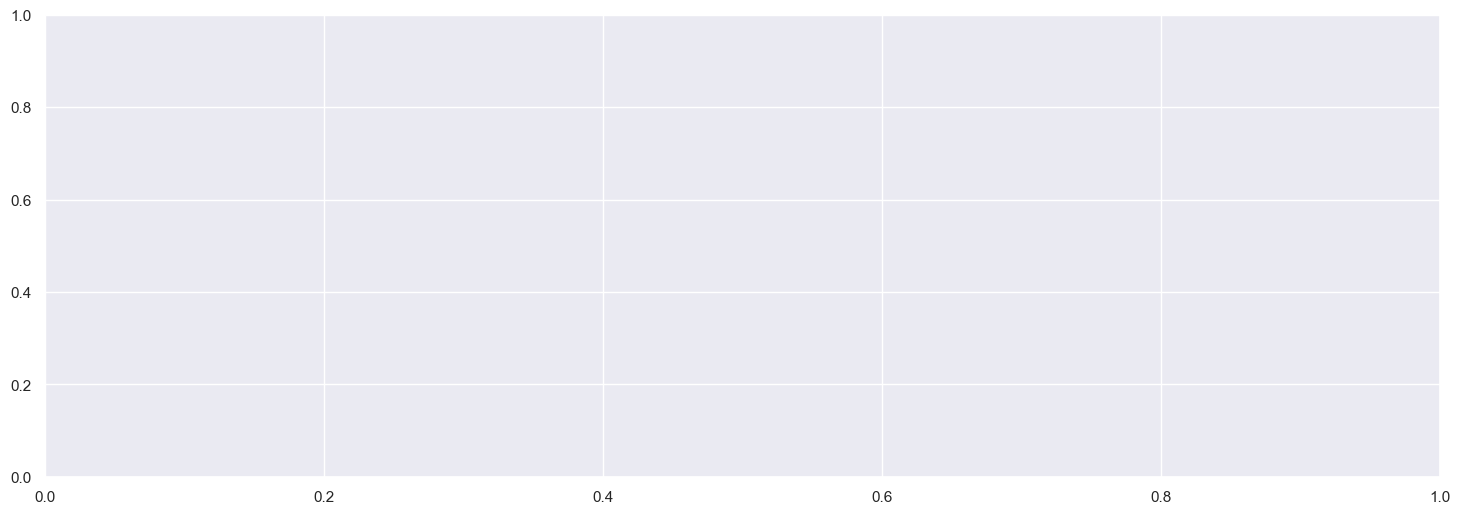

In [21]:
# --setup the figure with the axes
fig, ax = plt.subplots(figsize=(18,6))

#### Bar Plots using Seaborn

Text(0.5, 1.0, 'Total Sales Value By Country')

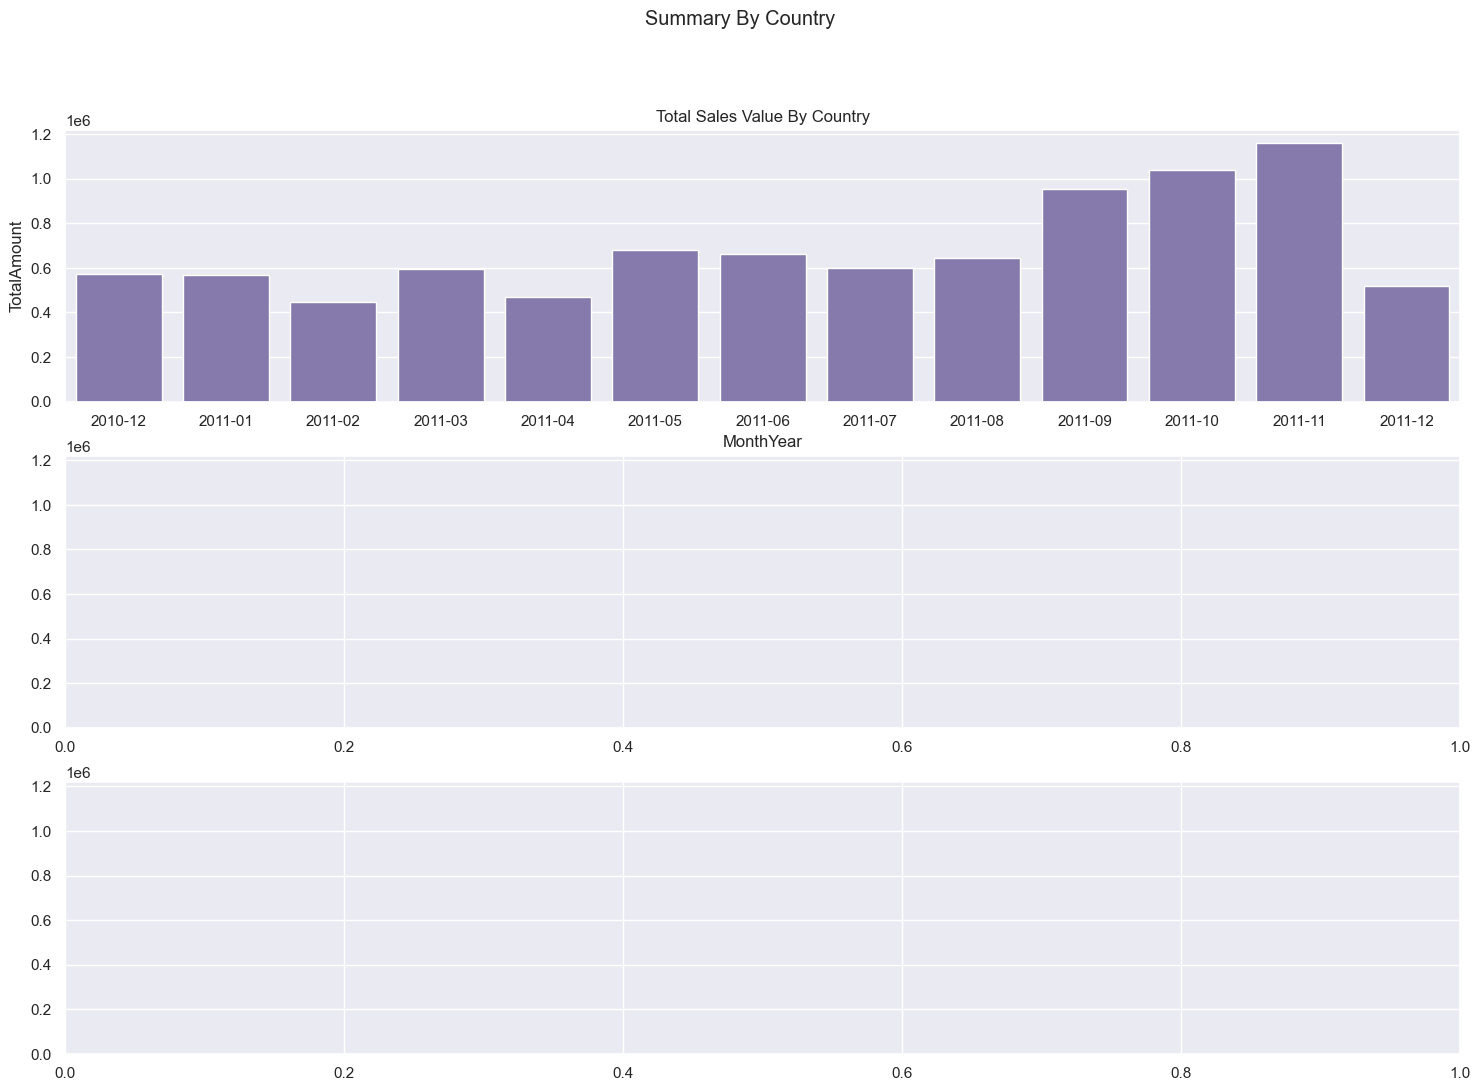

In [ ]:
fig, axes = plt.subplots(3,1, figsize=(18,12), sharey=True)
fig.suptitle('Summary By Country')

sns.barplot(ax=axes[0], x=monthly_agg_df.MonthYear, y=monthly_agg_df.TotalAmount, color='m')
axes[0].set_title("Total Sales Value By Country")